In [44]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics, model_selection
import numpy as np
import seaborn as sns
%matplotlib inline

In [12]:
#Read in data from source 
data = pd.read_csv("../assets/diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
data.shape

(53940, 11)

There are 53940 rows with 11 columns, i.e. there are 53940 diamonds with 11 different attributes
There is an index column called "Unnamed: 0" which we will drop as we already have an index in the DF.

In [14]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
data.shape


(53940, 10)

In [16]:
data.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [17]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


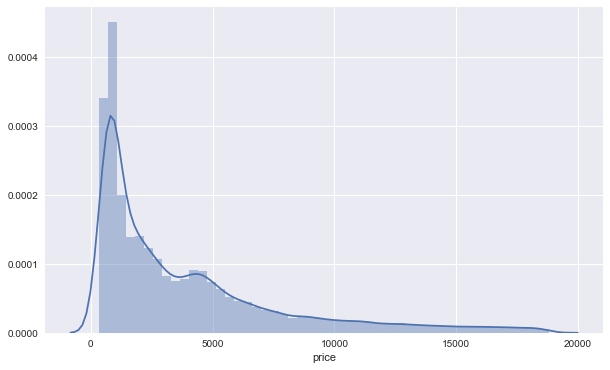

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(data["price"])
plt.show()

#Show price range we looking at

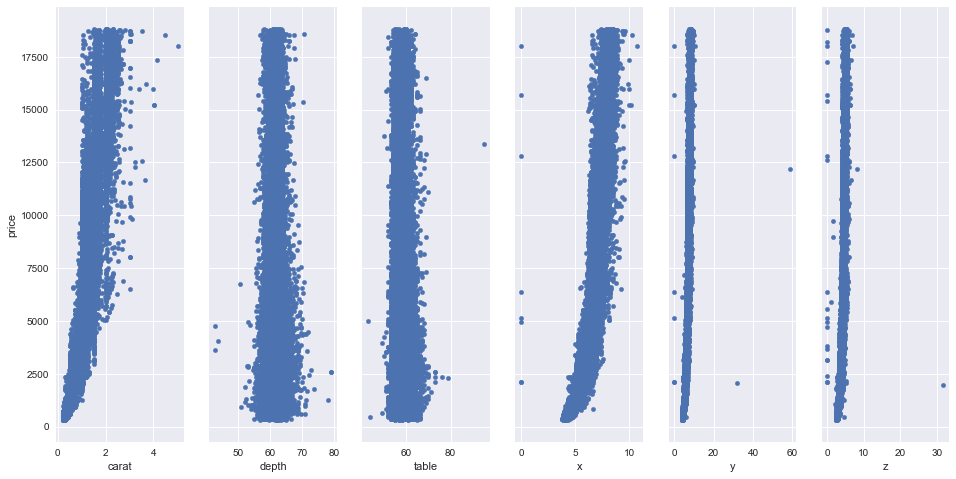

In [63]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, sharey=True)
data.plot(kind='scatter', x='carat', y='price', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='depth', y='price', ax=axs[1])
data.plot(kind='scatter', x='table', y='price', ax=axs[2])
data.plot(kind='scatter', x='x', y='price', ax=axs[3])
data.plot(kind='scatter', x='y', y='price', ax=axs[4])
data.plot(kind='scatter', x='z', y='price', ax=axs[5])
plt.show()

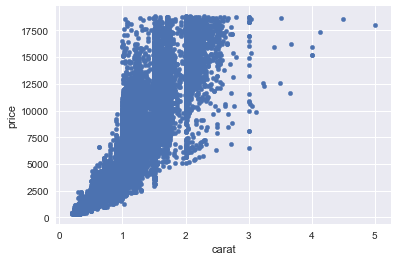

In [81]:
data_dummy.plot(kind='scatter', x='carat', y='price' )
plt.show()

In [30]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [31]:
data.columns

Index([u'carat', u'cut', u'color', u'clarity', u'depth', u'table', u'price',
       u'x', u'y', u'z'],
      dtype='object')

In [32]:
cut_dummies = pd.get_dummies(data.cut, drop_first=True, prefix='CUT')
color_dummies = pd.get_dummies(data.color, drop_first=True, prefix='COLOR')
clarity_dummies = pd.get_dummies(data.clarity, drop_first=True, prefix='CLARITY')
data_dummy = pd.concat([data, cut_dummies, color_dummies, clarity_dummies], axis=1)

#Create dummy variables for categorical variables

In [41]:
data_dummy_train, data_dummy_test = model_selection.train_test_split(data_dummy, random_state=1)
print data_dummy_train.shape, data_dummy_test.shape

(40455, 27) (13485, 27)


In [61]:
factors = np.concatenate((cut_dummies.columns, color_dummies.columns, clarity_dummies.columns, [ "carat" ]), axis=0)
factors

array(['CUT_Good', 'CUT_Ideal', 'CUT_Premium', 'CUT_Very Good', 'COLOR_E',
       'COLOR_F', 'COLOR_G', 'COLOR_H', 'COLOR_I', 'COLOR_J', 'CLARITY_IF',
       'CLARITY_SI1', 'CLARITY_SI2', 'CLARITY_VS1', 'CLARITY_VS2',
       'CLARITY_VVS1', 'CLARITY_VVS2', 'carat'], dtype=object)

Decided to focus only on factors available in the market when you buy as a consumer i.e. you would not be able to know the X,Y,Z of a diamond from a usual jeweller

In [68]:
data_dummy.corr()

,carat,depth,table,price,x,y,z,CUT_Good,CUT_Ideal,CUT_Premium,...,COLOR_H,COLOR_I,COLOR_J,CLARITY_IF,CLARITY_SI1,CLARITY_SI2,CLARITY_VS1,CLARITY_VS2,CLARITY_VVS1,CLARITY_VVS2
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.034196,-0.163660,0.116245,...,0.102465,0.161494,0.180054,-0.114449,0.062669,0.267483,-0.063094,-0.038904,-0.167571,-0.137024
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.136114,-0.022778,-0.198306,...,0.026037,0.022630,0.022543,-0.030881,0.040899,0.007202,-0.024169,-0.009459,-0.023477,-0.019243
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.175174,-0.549599,0.338072,...,0.011574,0.017967,0.037253,-0.078766,0.051959,0.095344,-0.026858,-0.009655,-0.069103,-0.062273
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,-0.000312,-0.097175,0.095706,...,0.059223,0.097125,0.081710,-0.049596,0.008957,0.128420,-0.009886,-0.001062,-0.095266,-0.052381
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.030349,-0.162674,0.126820,...,0.095896,0.146522,0.164658,-0.125976,0.079241,0.270827,-0.059882,-0.035507,-0.185253,-0.147151
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.032187,-0.153158,0.107943,...,0.093480,0.142895,0.160776,-0.120800,0.076097,0.263252,-0.056490,-0.035928,-0.179271,-0.141624
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.045169,-0.158688,0.090019,...,0.095041,0.145276,0.164217,-0.125248,0.081005,0.263192,-0.058513,-0.036314,-0.182401,-0.144746
CUT_Good,0.034196,0.136114,0.175174,-0.000312,0.030349,0.032187,0.045169,1.000000,-0.258018,-0.185385,...,-0.009517,0.006187,0.014977,-0.033046,0.055938,0.041970,-0.017116,-0.021063,-0.037564,-0.038627
CUT_Ideal,-0.163660,-0.022778,-0.549599,-0.097175,-0.162674,-0.153158,-0.158688,-0.258018,1.000000,-0.478074,...,-0.021264,-0.009225,-0.038490,0.104986,-0.082865,-0.108242,0.034247,0.015669,0.088354,0.075508
CUT_Premium,0.116245,-0.198306,0.338072,0.095706,0.126820,0.107943,0.090019,-0.185385,-0.478074,1.000000,...,0.027895,0.005899,0.017231,-0.054013,0.023275,0.067623,-0.011866,0.022611,-0.053852,-0.061949


In [70]:
kf = model_selection.KFold(n_splits=10, shuffle=True)
rmse_list = []
for train_index, test_index in kf.split(data_dummy):
    data_dummy_kf_train = data_dummy.iloc[train_index]
    data_dummy_kf_test = data_dummy.iloc[test_index]
    lm_kf = LinearRegression().fit(data_dummy_kf_train[factors], data_dummy_kf_train["price"])
    data_dummy_kf_preds = lm_kf.predict(data_dummy_kf_test[factors])
    #print "Intercept:",lm_kf.intercept_
    #print "Coefficients:",lm_kf.coef_
    rmse = np.sqrt(metrics.mean_squared_error(data_dummy_kf_preds, data_dummy_kf_test["price"]))
    rmse_list.append(rmse)
    print "RMSE:", rmse
print "Mean RMSE:", np.mean(rmse_list)

#Model is about $1150 off from actual price

RMSE: 1159.29424227
RMSE: 1144.2058429
RMSE: 1167.52748651
RMSE: 1158.4942
RMSE: 1151.05676926
RMSE: 1217.29491628
RMSE: 1123.71506636
RMSE: 1166.67070473
RMSE: 1137.8817945
RMSE: 1145.89927714
Mean RMSE: 1157.20402999


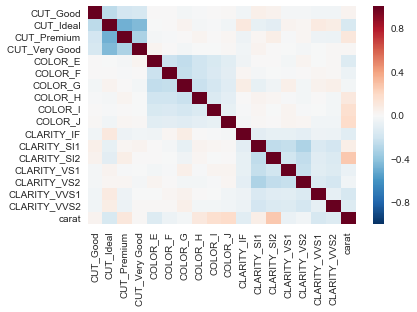

In [79]:
sns.heatmap(data_dummy[factors].corr())
plt.show()

#No significant correlation amongst the factors

In [71]:
lm = LinearRegression().fit(data_dummy[factors], data_dummy["price"])

In [82]:
#array(['CUT_Good', 'CUT_Ideal', 'CUT_Premium', 'CUT_Very Good', 'COLOR_E',
#       'COLOR_F', 'COLOR_G', 'COLOR_H', 'COLOR_I', 'COLOR_J', 'CLARITY_IF',
#       'CLARITY_SI1', 'CLARITY_SI2', 'CLARITY_VS1', 'CLARITY_VS2',
#       'CLARITY_VVS1', 'CLARITY_VVS2', 'carat'], dtype=object)

#Very Good cut, Color E, Clarity IF, 1 carat prediction
lm.predict( [ 0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1 ] )

/Users/desmondong/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 7580.00796713])